In [4]:
# import the MongoClient class
from pymongo import MongoClient
import pymongo

# import the Pandas library
import pandas as pd

# import the NumPy library as an alias
import numpy as np
import creds


# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


#
import datetime
import re

In [5]:
currtime=datetime.datetime.now()

In [7]:
client = MongoClient("mongodb://storage:27017/", username='judyread', password=creds.judyro,authSource='admin', authMechanism='SCRAM-SHA-1')
db = client["judy"]
col = db.exps
response=col.find().sort('$natural', pymongo.DESCENDING).limit(100000)
client.close()

In [277]:
# test to see if response is populated
#list(response)

In [8]:
df =  pd.DataFrame(list(response))

#### Make a readable date

In [10]:
df['date'] = pd.to_datetime(df['time'], unit='s')

#### Fix the NaNs. 

In [11]:
# clean up all NaNs by replacing them with the modal Series value.
# This is fine here because most of the missing data are not very unique - 
# This would be a little better if we did it by player id
#
# must use df[c].isnull().values.any() to check the individual values
for c in df.columns:
    if df[c].isnull().values.any():
        df[c].fillna(df[c].mode()[0], inplace=True)

#### Transform Objects to ints and strings

In [12]:
# transform the Objects to ints and strings. need to add booleans
# all entries are Objects - change numbers to ints and strings to strings
for c in df.columns:
    print(c)
    foo = str(df[c][0])
    if foo.isnumeric():
        df[c] = df[c].astype(int)
    elif foo.isalpha():
        df[c] = df[c].astype(str)
    else:
        print(type(df[c][0]))

_id
<class 'bson.objectid.ObjectId'>
armor_on
bank
clarity_on
current_con
current_dex
current_int
current_str
current_wis
currenthps
currentmana
experience
gold
harm_multiplier
infravision_on
kick_multiplier
kick_timer
kickbonus
mainmob
<class 'str'>
maxhps
maxmana
maxmoves
name
regeneration_on
room
sanctuary_on
senselife_on
strength_on
time
date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Clean up columns

In [15]:
del df['_id']

In [18]:
neworder = ['date', 'name','maxhps', 'maxmana', 'maxmoves',
        'current_con', 'current_dex','current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'bank',
      'harm_multiplier','kick_multiplier', 'kick_timer', 'kickbonus',
       'room','mainmob', 'armor_on', 'clarity_on',  
       'infravision_on','sanctuary_on', 'senselife_on',
       'strength_on','regeneration_on',   'time' ]

In [19]:
df = df[neworder]

#### Complete!

In [21]:
df.head()

,date,name,maxhps,maxmana,maxmoves,current_con,current_dex,current_int,current_str,current_wis,...,room,mainmob,armor_on,clarity_on,infravision_on,sanctuary_on,senselife_on,strength_on,regeneration_on,time
0,2019-08-10 11:54:05,Ida,212889,10075,543,79,40,52,45,183,...,6105,tree2,1,1,1,1,1,1,1,1565438045
1,2019-08-10 11:54:09,Clem,155361,10048,670,40,40,52,45,201,...,6123,tree4,1,1,1,1,1,1,1,1565438049
2,2019-08-10 11:54:05,Quinton,172432,10009,565,1,169,176,40,40,...,6105,tree2,1,1,3,1,1,1,1,1565438045
3,2019-08-10 11:54:09,Bert,221582,10395,654,40,40,40,45,213,...,6105,tree2,1,1,1,1,1,1,1,1565438049
4,2019-08-10 11:54:09,Lee,111038,10024,652,60,40,45,44,117,...,6109,tree1,1,1,1,1,1,1,1,1565438049


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
date               100000 non-null datetime64[ns]
name               100000 non-null object
maxhps             100000 non-null int64
maxmana            100000 non-null int64
maxmoves           100000 non-null int64
current_con        100000 non-null int64
current_dex        100000 non-null int64
current_int        100000 non-null int64
current_str        100000 non-null int64
current_wis        100000 non-null int64
currenthps         100000 non-null int64
currentmana        100000 non-null int64
experience         100000 non-null int64
gold               100000 non-null int64
bank               100000 non-null int64
harm_multiplier    100000 non-null int64
kick_multiplier    100000 non-null int64
kick_timer         100000 non-null int64
kickbonus          100000 non-null int64
room               100000 non-null int64
mainmob            100000 non-null object
armor_on          

### Data analysis

In [27]:
df[df['name']=='Thurston']['experience'].max(), df[df['name']=='Thurston']['experience'].min()

(1622435116, 51239)

<Figure size 1440x720 with 0 Axes>

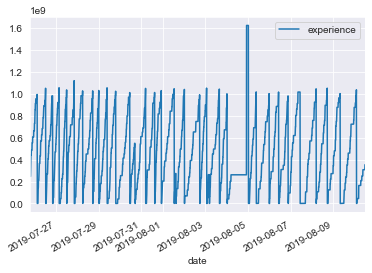

In [58]:
plt.figure(figsize=(20,10))
df[df['name'] == 'Thurston'].plot(x='date',y='experience')


<Figure size 1440x720 with 0 Axes>

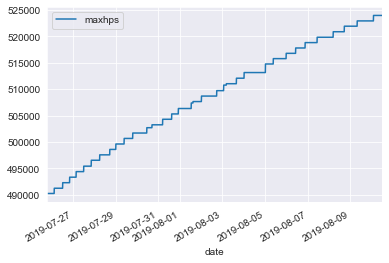

In [61]:
plt.figure(figsize=(20,10))
df[df['name'] == 'Thurston'].plot(y='maxhps',x='date')

In [80]:
df['name'].unique()

array(['Ida', 'Clem', 'Quinton', 'Bert', 'Lee', 'Paul', 'Titas', 'Una',
       'Marioche', 'Thurston', 'Yoric', 'Sandra', 'Victor', 'Squeaky',
       'Steve', 'Mary', 'Desmond', 'Xerxes', 'Cappy', 'George', 'Gypsy',
       'Sadie', 'Olive', 'Ouisch', 'Hector', 'Linda', 'Susan', 'Rhoda',
       'Bruce', 'Prue', 'Maud', 'Clair', 'Bobby', 'Amy', 'James', 'Katie',
       'Zilla', 'Nevil', 'Kate', 'Manson', 'Winnie', 'Kim', 'Alice',
       'Fanny', 'Leo'], dtype=object)

In [89]:
sub1 = ['Ida', 'Clem', 'Quinton', 'Bert', 'Lee', 'Paul', 'Titas', 'Una']

In [90]:
df10 = df[df['name'].isin(sub1)]

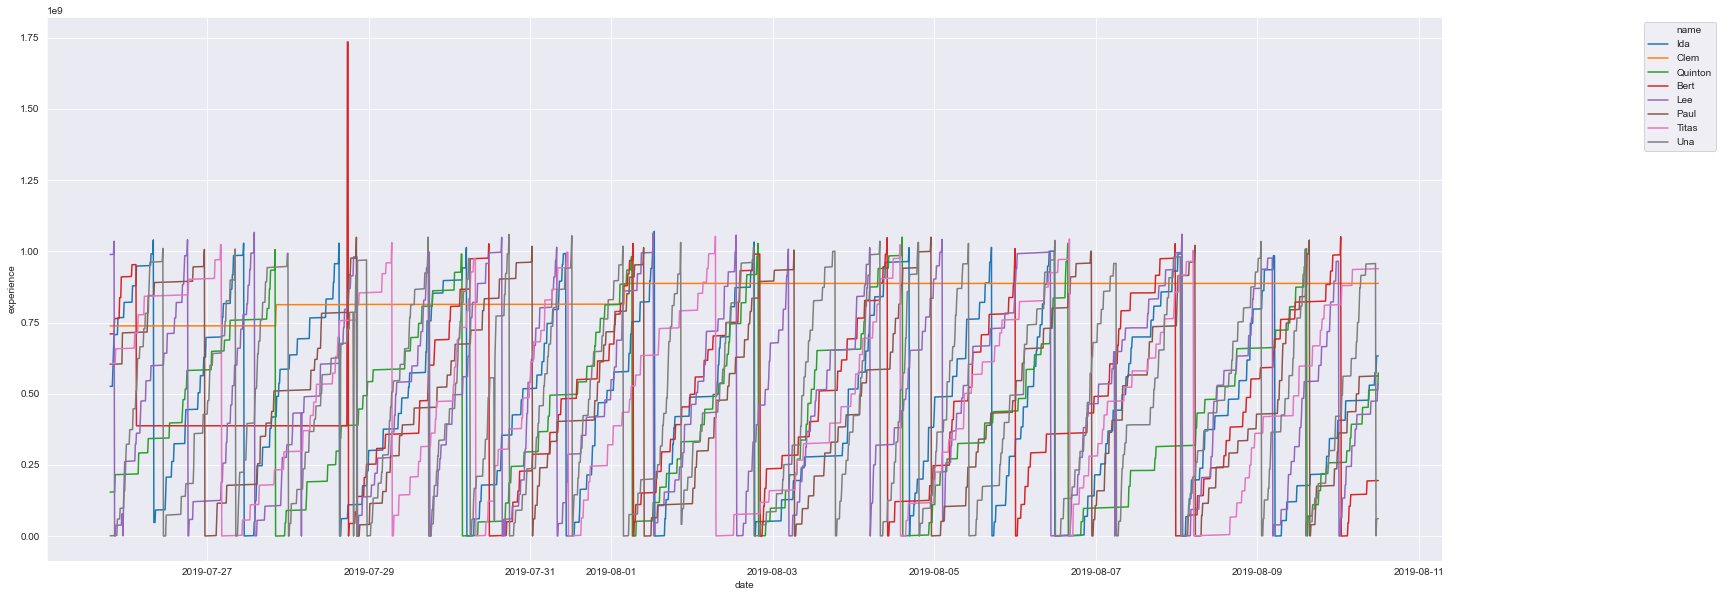

In [91]:
plt.figure(figsize=(25,10))
sns.lineplot('date', 'experience', hue='name', 
             data=df10)
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))

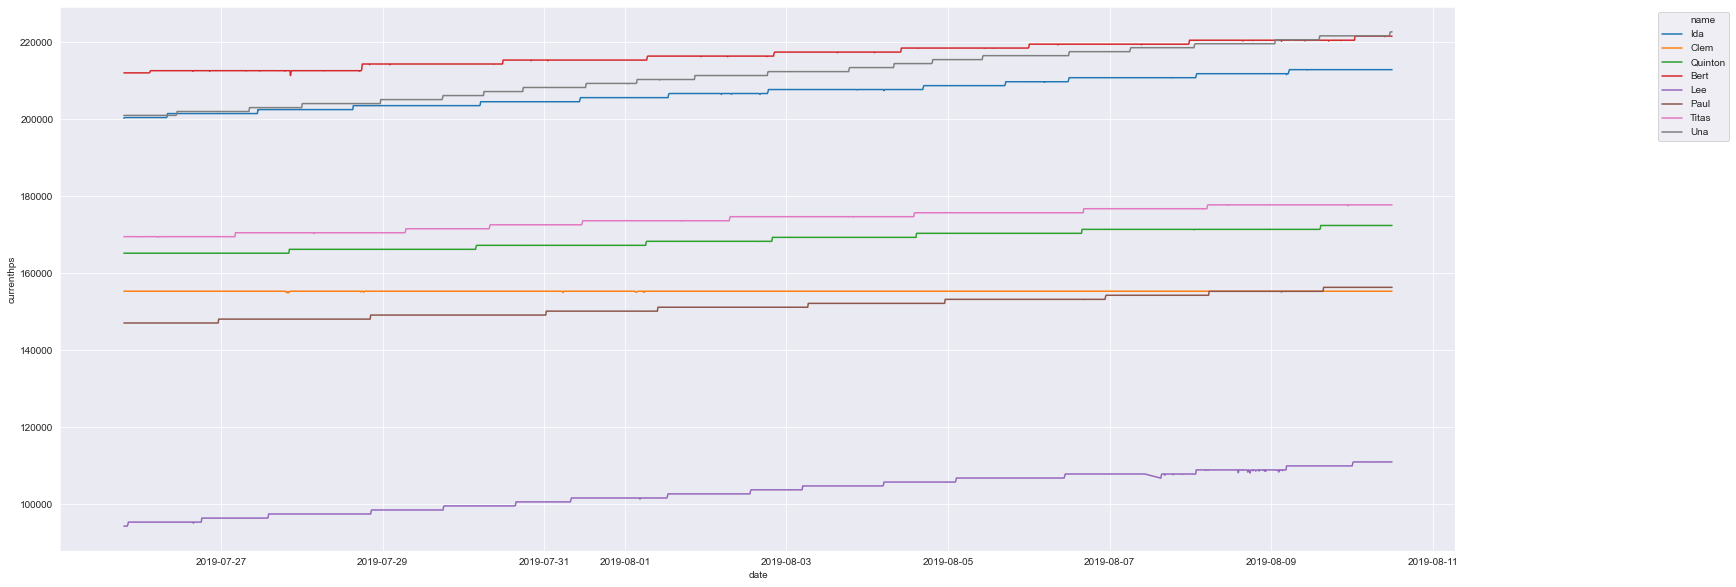

In [92]:
plt.figure(figsize=(25,10))
sns.lineplot('date', 'currenthps', hue='name', 
             data=df10)
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))